### Главна скрипта за примену ТоМАТо алгоритма за сегментацију просторије

In [3]:
%run imports.ipynb

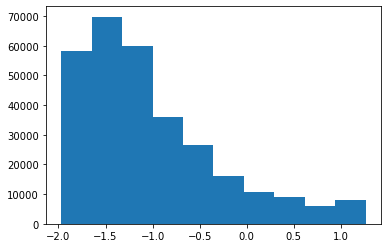

<IPython.core.display.Javascript object>


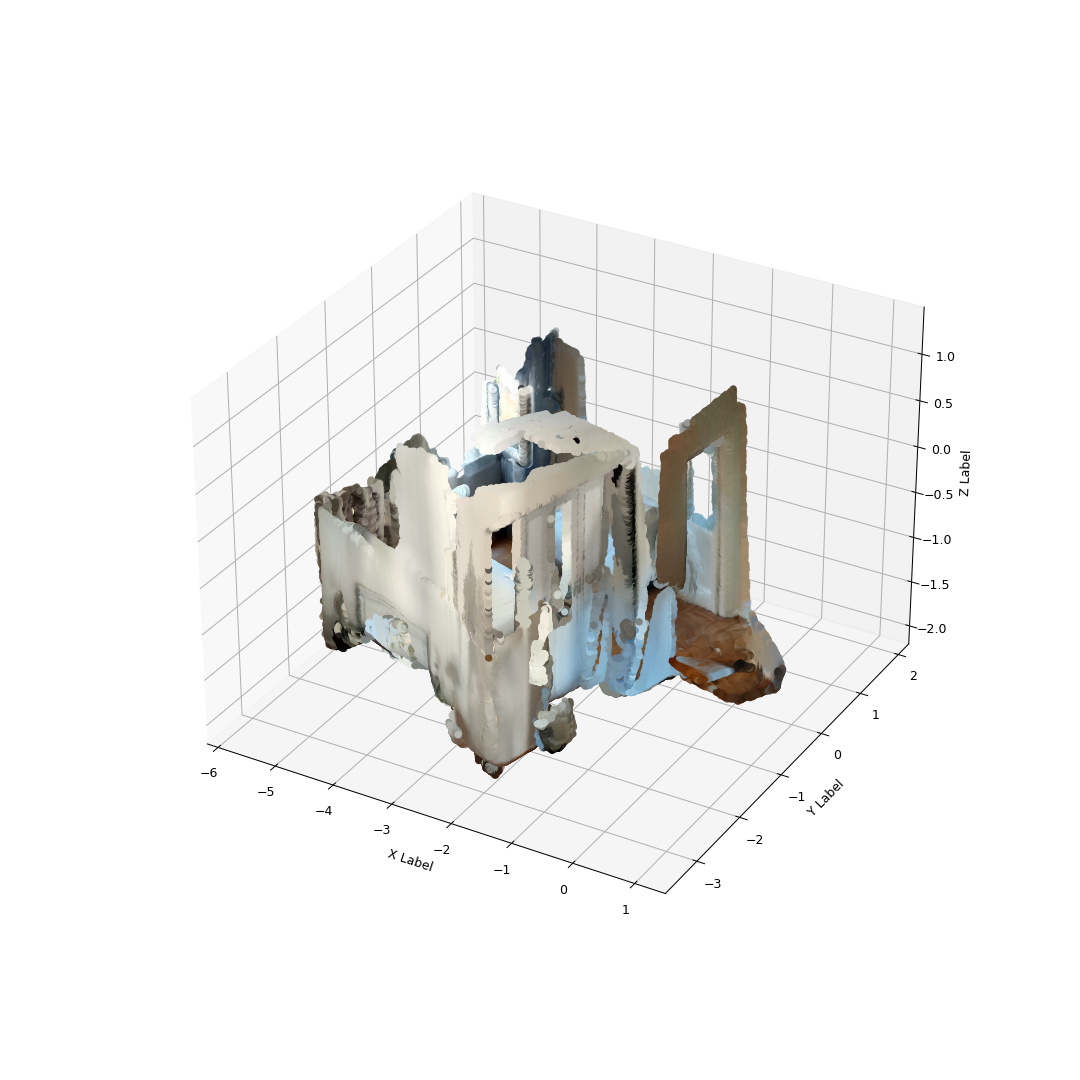

In [4]:
%run PointCloud.ipynb

In [6]:
cloud

//X         Y         Z    R    G    B        Nx        Ny  \
0       1.951022 -0.969442 -3.195556  189  184  174 -0.486026  0.017502   
1       1.937112 -0.957436 -3.198210  193  188  178 -0.349316 -0.078364   
2       1.954078 -0.970791 -3.193409  183  179  167 -0.471173  0.045069   
3       1.935403 -0.980383 -3.201123  191  187  177 -0.408622  0.016972   
4       1.948683 -0.982448 -3.193059  194  192  181 -0.481663  0.131626   
...          ...       ...       ...  ...  ...  ...       ...       ...   
300519  2.969137 -0.853679  1.158238  151  164  167  0.311672  0.683095   
300520  2.966460 -0.867029  1.151915  120  116  110  0.835203  0.542954   
300521  4.325616 -1.686318 -1.653786  126  131  126  0.894688  0.446689   
300522  5.495355 -0.387523 -1.989857  188  183  171  0.372586  0.866301   
300523  4.389519 -1.728719  1.118670  189  182  170 -0.145912  0.876916   

              Nz  
0       0.873769  
1       0.933722  
2       0.880889  
3       0.912546  
4       0.866415  
...          ...  
300519 -0.660486  
300520 -0.087388  
300521  0.001310  
300522 -0.332721  
300523 -0.457961  

[300524 rows x 9 columns]

In [7]:
x_dist = np.vstack((cloud.iloc[:,0], cloud.iloc[:,1], cloud.iloc[:,2])).T
x_normal = np.vstack((cloud.iloc[:,6], cloud.iloc[:,7], cloud.iloc[:,8])).T
x_rgb = np.vstack((cloud.iloc[:,3]/255, cloud.iloc[:,4]/255, cloud.iloc[:,5]/255)).T
x_rgb.shape, x_dist.shape

((300524, 3), (300524, 3))

In [8]:
x_rgb

array([[0.74117647, 0.72156863, 0.68235294],
       [0.75686275, 0.7372549 , 0.69803922],
       [0.71764706, 0.70196078, 0.65490196],
       ...,
       [0.49411765, 0.51372549, 0.49411765],
       [0.7372549 , 0.71764706, 0.67058824],
       [0.74117647, 0.71372549, 0.66666667]])

In [9]:
x_dist

array([[ 1.95102179, -0.96944159, -3.19555593],
       [ 1.93711185, -0.95743555, -3.19820952],
       [ 1.9540776 , -0.97079062, -3.1934092 ],
       ...,
       [ 4.32561588, -1.68631816, -1.65378582],
       [ 5.49535465, -0.38752297, -1.98985684],
       [ 4.38951874, -1.728719  ,  1.11866999]])

In [10]:
import cv2
x = cv2.cvtColor(np.array([list(x_rgb)], 'float32'), cv2.COLOR_RGB2Luv)
x = x.reshape((x_rgb.shape[0], 3))
x

array([[74.923325 ,  3.485897 ,  8.303954 ],
       [76.386505 ,  3.4821272,  8.301704 ],
       [72.95628  ,  3.017569 ,  9.698726 ],
       ...,
       [54.21167  , -2.5518222,  3.2986586],
       [74.50784  ,  3.6079504,  9.813396 ],
       [74.303154 ,  4.8035083, 10.046568 ]], dtype=float32)

In [8]:
np.linalg.norm((x.min(axis=0), x.max(axis=0)))

155.2426

In [9]:
x.std()

27.581211

In [11]:
vec = pd.read_csv('C:/Users/vilda/Dropbox/TDA/TopoloskaAnalizaPodataka/PythonCodes/clustering/clustering_cloud/fancy_medium_gustina.csv')['0']

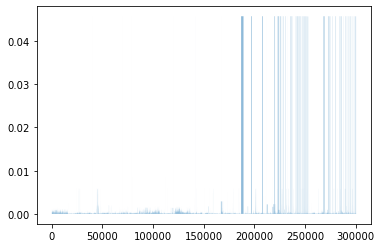

In [11]:
%run estimate_density2.ipynb

In [12]:
vec

0         0.000121
1         0.000094
2         0.000456
3         0.000082
4         0.000901
            ...   
300519    0.000125
300520    0.000016
300521    0.045738
300522    0.000234
300523    0.000110
Name: 0, Length: 300524, dtype: float64

In [13]:
min(vec), max(vec)

(3.3011941191802158e-06, 0.0457382800798518)

In [14]:
pd.DataFrame(vec).to_csv('C:/Users/vilda/Dropbox/TDA/TopoloskaAnalizaPodataka/PythonCodes/clustering/clustering_cloud/fancy_medium_gustina.csv')

In [14]:
kdt = KDTree(x, metric='euclidean')

In [15]:
kdt_dist = KDTree(x_dist, metric='euclidean')

In [16]:
kdt_normal = KDTree(x_normal, metric='euclidean')

In [59]:
from random import randrange
train = np.asarray([randrange(x.shape[0]) for i in np.arange(50000)])
train.shape

(50000,)

In [60]:
x_train = x[train]
x_dist_train = x_dist[train]
x_normal_train = x_normal[train]

In [83]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(x_train, 'single')

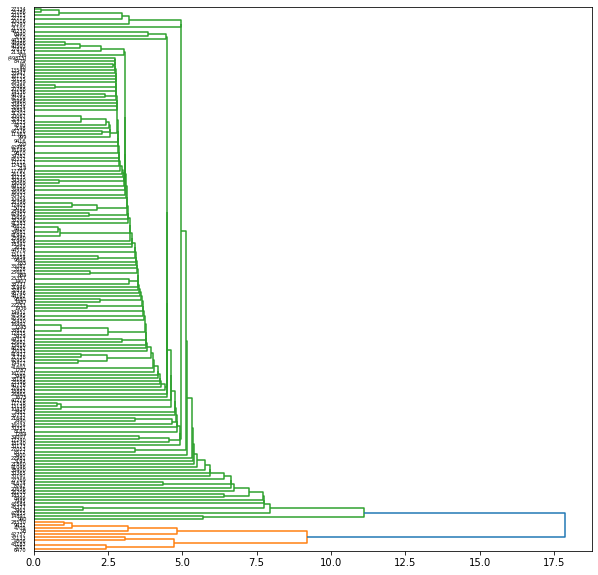

In [84]:
%matplotlib inline
plt.figure(figsize=(10,10))
dn = hierarchy.dendrogram(Z, p=100,truncate_mode='level', orientation='right')

In [21]:
rads = np.linspace(0, 0.07, 20)
count_neis = [np.mean([kdt_dist.query_radius([x_train[i]], rads[j], return_distance=False)[0].shape[0] for i in np.arange(x_train.shape[0])]) 
           for j in range(len(rads))]

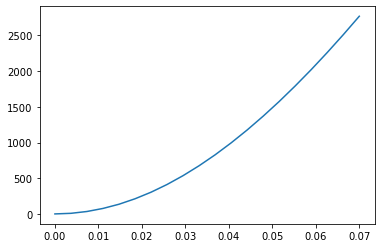

In [22]:
%matplotlib inline
plt.plot(rads, count_neis)
#plt.axvline(1.5)
#plt.axhline(50)

In [17]:
radius_dist = 0.1

In [18]:
radius_normal = 0.05

In [111]:
rastojanja = [[(np.linalg.norm(x[ind]-x[elem])) 
                     for elem in kdt_dist.query_radius([x_dist[ind]], radius_dist, return_distance=False)[0]]
              for ind in range(x.shape[0])]

In [112]:
rastojanja_median = [np.median(elem) for elem in rastojanja]

In [113]:
rastojanja_max = [np.max(elem) for elem in rastojanja]

In [114]:
%matplotlib inline

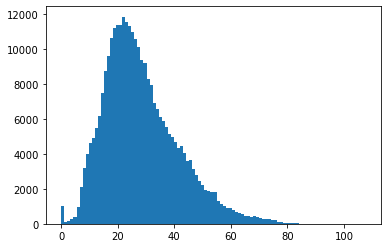

In [115]:
plt.hist(rastojanja_median, bins=100)
plt.show()

In [116]:
rastojanja

[[20.031897,
  15.79658,
  4.489979,
  30.990713,
  3.0790138,
  9.786507,
  43.852844,
  46.124714,
  39.078587,
  13.202849,
  4.8086023,
  25.266294,
  15.385243,
  9.2203665,
  36.811485,
  44.46404,
  9.607,
  7.187525,
  16.434736,
  10.260337,
  7.770102,
  2.6147966,
  33.70047,
  13.833241,
  4.471651,
  7.047469,
  9.64016,
  40.219936,
  7.8137493,
  9.199718,
  5.868474,
  6.7495236,
  54.497395,
  5.2672124,
  30.800236,
  40.72029,
  5.0934167,
  2.9925091,
  9.1804,
  0.0,
  20.72751,
  15.887408,
  20.935627,
  56.746136,
  14.369181,
  10.729426,
  21.638449,
  13.496346,
  34.78671,
  3.7745163,
  15.79658,
  41.504654,
  8.898123,
  15.90606,
  2.6147966,
  21.163908,
  4.1568637,
  5.437015,
  13.818552,
  7.5610867,
  4.0880384,
  20.477867,
  31.621567,
  42.304497,
  13.833241,
  12.222813,
  44.960384],
 [43.725708,
  11.075005,
  12.312786,
  30.51074,
  12.856951,
  4.210198,
  9.369988,
  13.155524,
  11.788173,
  14.904087,
  4.819287,
  54.29433,
  15.96508

In [19]:
radius = 6

In [20]:
neighbours_dist = 300

In [21]:
%run unionfind.ipynb
unf = UnionFind()

In [22]:
index_sorted = np.asarray([i for (e,i) in sorted([(e,i) for i,e in enumerate(vec)])])
vec_sorted = {i:e for (e,i) in sorted([(e,i) for i,e in enumerate(vec)])}
vec_sorted

{30562: 3.3011941191802158e-06,
 103600: 3.3011941191802158e-06,
 193376: 3.3011941191802158e-06,
 193428: 3.3011941191802158e-06,
 193434: 3.3011941191802158e-06,
 197668: 3.3011941191802158e-06,
 226807: 3.3011941191802158e-06,
 239770: 3.3011941191802158e-06,
 239775: 3.3011941191802158e-06,
 239782: 3.3011941191802158e-06,
 239791: 3.3011941191802158e-06,
 239792: 3.3011941191802158e-06,
 239862: 3.3011941191802158e-06,
 239878: 3.3011941191802158e-06,
 239880: 3.3011941191802158e-06,
 239888: 3.3011941191802158e-06,
 244376: 3.3011941191802158e-06,
 244387: 3.3011941191802158e-06,
 245387: 3.3011941191802158e-06,
 245952: 3.3011941191802158e-06,
 245957: 3.3011941191802158e-06,
 245977: 3.3011941191802158e-06,
 251517: 3.3011941191802158e-06,
 275244: 3.3011941191802158e-06,
 289899: 3.3011941191802158e-06,
 293858: 3.3011941191802158e-06,
 298447: 3.3011941191802158e-06,
 298637: 3.3011941191802158e-06,
 300194: 3.3011941191802158e-06,
 148649: 3.301194119180233e-06,
 185890: 3.3

In [23]:
def define_clusters(vec_sorted, radius, tau):

    unf = UnionFind()
    n=len(vec)
    births = {}
    deaths = {}
    for i in reversed(range(n)):
        idx = index_sorted[i]
        nei = kdt.query_radius([x[idx]], radius, return_distance=False)[0]
        nei_dist = kdt_dist.query([x_dist[idx]], neighbours_dist, return_distance=False)[0]
        nei_normal = kdt_normal.query_radius([x_normal[idx]], radius_normal, return_distance=False)[0]
        S = [elem for elem in nei_dist if ((elem in index_sorted[(i+1):]) & (elem in nei) & (elem in nei_normal))] 

        if not S:
            unf.insert_objects([idx]) 
            births[idx] = -vec_sorted[idx]
        else:
            parent = S[np.asarray([vec_sorted[j] for j in S]).argmax()]
            unf.union(parent, idx)
            roots = [unf.find(ele) for ele in S]
            highest = roots[np.asarray([vec_sorted[elem] for elem in roots]).argmax()]
            for root in roots:                   
                if (root != parent) & (vec_sorted[root] - vec_sorted[idx] < tau):
                    unf.union(parent, root)
                    deaths[root] = -vec_sorted[idx]
            if (highest != parent) & (vec_sorted[parent] - vec_sorted[idx] < tau):
                unf.union(highest, parent)
                deaths[parent] = -vec_sorted[idx]
    return unf, births, deaths

In [24]:
radius, radius_normal, neighbours_dist

(6, 0.05, 300)

In [25]:
unf, births, deaths = define_clusters(vec_sorted, radius=radius, tau=100000)

In [26]:
len(np.unique(list(unf.parent_pointers.values())))

105512

In [27]:
for idx in births.keys():
    if (idx not in deaths.keys()):
        deaths[idx] = np.inf

In [28]:
lifecycle = [(births[idx], deaths[idx]) for idx in births.keys()]

In [74]:
res = [(0, elem) for elem in lifecycle]
res

[(0, (-0.0457382800798518, -0.0457382800798518)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf)),
 (0, (-0.0457382800798518, inf))

In [75]:
persistence = [elem[1]-elem[0] for elem in lifecycle]
sorted([elem for elem in persistence if ~np.isinf(elem)], reverse=True)

[0.0457349768337991,
 0.045734974545301135,
 0.045734974545301135,
 0.04573489850840976,
 0.045734891513809925,
 0.04573484376733497,
 0.04573440937993089,
 0.04573433483995784,
 0.04573414979825212,
 0.045733903115736815,
 0.045733751063081536,
 0.0457333804828341,
 0.0457328866706846,
 0.045732226137846506,
 0.045732226137846506,
 0.04573221274376199,
 0.045731928240125626,
 0.045731928240125626,
 0.04573188875708985,
 0.045731511599853954,
 0.04573127512777289,
 0.045731201026456614,
 0.04573107689217037,
 0.045731050463765376,
 0.04573104144991719,
 0.045730490918136815,
 0.04573021018647652,
 0.04573011447670218,
 0.0457298981324025,
 0.0457298981324025,
 0.0457298981324025,
 0.04572961807810045,
 0.04572961807810045,
 0.04572958245203959,
 0.04572958245203959,
 0.045729563521721944,
 0.04572945444986724,
 0.045729075072871335,
 0.04572903994696788,
 0.04572900071700623,
 0.045728771480017555,
 0.04572864132882273,
 0.04572857731037994,
 0.04572830188194385,
 0.045728054938483115,

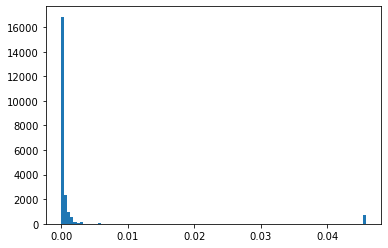

In [76]:
plt.hist([elem for elem in persistence if ~np.isinf(elem)], bins=100)
plt.show()

<Figure size 1296x288 with 0 Axes>

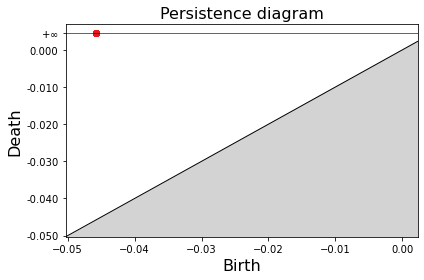

In [77]:
plt.figure(figsize=(18, 4))
fig = gds.GridSpec(1, 1)
gudhi.plot_persistence_diagram(res)
plt.tight_layout()
plt.show()

<Figure size 1296x288 with 0 Axes>

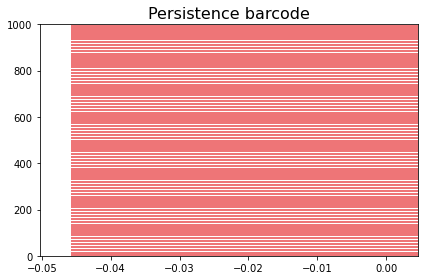

In [78]:
plt.figure(figsize=(18, 4))
fig = gds.GridSpec(1, 1)
gudhi.plot_persistence_barcode(res)
plt.tight_layout()
plt.show()

In [29]:
cen, sts = [], []
ind = np.asarray(list(unf.num_to_objects.values()))
rts = np.asarray(list(unf.parent_pointers.values()))

In [30]:
for ele in np.unique(rts):
    cen.append(unf.num_to_objects[ele])
    sts.append(ind[np.where(rts == ele)[0]])

In [31]:
cen = np.asarray(cen)

In [32]:
cen

array([300515, 300514, 300503, ..., 193376, 103600,  30562])

In [33]:
sts

[array([300515]),
 array([300514]),
 array([300503]),
 array([300502]),
 array([300501]),
 array([300500]),
 array([300499]),
 array([300497]),
 array([300496]),
 array([300495]),
 array([300493]),
 array([300491]),
 array([300490]),
 array([300487]),
 array([300485, 246820]),
 array([300478]),
 array([300475]),
 array([300474]),
 array([300473]),
 array([300466]),
 array([300465]),
 array([300464, 274462, 274461]),
 array([300445]),
 array([300444]),
 array([300441]),
 array([300439]),
 array([300436]),
 array([300435]),
 array([300434]),
 array([300429]),
 array([300425]),
 array([300423]),
 array([300407, 187314]),
 array([300406]),
 array([300403]),
 array([300402]),
 array([300399]),
 array([300398]),
 array([300391]),
 array([300390, 300389]),
 array([300388]),
 array([300387]),
 array([300382]),
 array([300381]),
 array([300380]),
 array([300379]),
 array([300378]),
 array([300377]),
 array([300376]),
 array([300373]),
 array([300372]),
 array([300361]),
 array([300360]),
 array

In [34]:
len(sts)

105512

In [35]:
threshold = 300
cluster_size = []
i=0
for elem in sts:
    if len(elem) > threshold:
        i=i+1
    print(len(elem))
    cluster_size.append(len(elem))
print('Broj klastera vecih od ', threshold,' je ',i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
3
1
4
5
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
2
3
1
1
1
1
3
1
6
1
3
1
1
1
2
2
1
1
1
1
1
1
1
1


1
3
3
1
4
1
1
1
1
3
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
1
1
1
2
3
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
4
1
1
2
1
1
1
1
1
1
1
1
23
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
7
3
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
3
1
1
2
1
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
266
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
4
1
1
1
1
1
1
1
5
1
1
1
1
2
3
3
2
1
1
2
4
1
2
2
1
1
1
1
1
1
1
1
3
1
2
1
1
11
2
2
1
1
1
1
1
6
1
1
9
1
8
8
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
3
2
1
2
3
1
1
1
1
2
1
1
1
3
1
1
1
1
1
1
1
1
1
3
1
4
1
18
1
1
1
1
3
1
4
2
1
1
1
1
4
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1

1
1
1
1
1
2
1
1
3
11
2
1
1
1
2
1
2
1
1
1
2
4
1
1
1
3
3
5
3
1
2
2
1
1
1
1
1
1
2
1
1
1
1
1
14
2
3
4
2
2
1
2
1
1
1
2
1
1
2
1
9
5
1
2
1
1
1
2
2
1
2
1
1
1
1
1
1
1
1
5
1
1
2
1
2
1
1
1
1
4
2
2
1
1
1
3
1
1
1
1
3
4
2
1
6
1
1
5
1
1
1
1
1
1
3
1
1
6
15
2
1
1
1
1
2
2
1
1
8
2
1
1
2
1
1
1
1
1
1
1
2
1
3
3
1
1
1
4
1
1
1
1
1
1
2
1
1
1
2
1
1
3
1
1
2
2
2
1
12
1
1
2
1
1
3
1
1
1
1
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
2
1
2
2
1
2
1
1
1
1
1
1
1
1
3
2
1
1
1
9
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
8
1
4
1
1
1
1
3
1
1
3
1
3
1
1
1
1
1
3
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
3
22
5
2
1
1
3
2
2
1
1
1
1
1
1
1
2
1
1
3
1
2
1
2
3
1
1
1
1
1
1
2
1
3
1
1
1
2
3
2
4
5
2
1
3
1
5
7
1
1
2
9
1
1
1
2
4
1
1
1
1
1
1
1
1
2
1
14
17
1
4
1
5
2
1
1
1
7
1
2
7
2
2
1
1
3
6
1
1
1
2
1
1
2
1
2
1
1
5
1
3
2
1
5
2
2
1
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
3
4
7
1
4
1
1
1
1
1
3
2
1
1
1
1
1
3
1
1
1
1
1
1
1
3
1
5
1
1
2
1
3
1
1
2
2
1
1
1
1
2
1
1
3
1
1
3
1
1
2
1
1
2
1
1
2
3
1
1
1
1
1

1
3
1
2
1
2
1
2
1
6
2
1
4
1
2
3
1
1
1
1
1
1
1
42
1
1
1
1
1
1
1
1
3
2
1
2
4
3
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
3
1
1
14
2
3
1
1
1
1
1
1
2
1
1
4
1
1
1
1
1
1
1
3
1
1
2
1
1
1
3
1
3
1
2
3
1
2
2
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
29
1
1
3
2
1
2
1
1
1
1
3
1
1
10
1
2
2
3
4
1
3
1
1
4
2
1
1
1
1
1
1
2
1
1
1
3
1
2
2
1
1
1
1
1
1
1
1
2
1
6
1
3
3
1
1
1
1
1
9
1
1
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
8
25
4
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
2
1
1
1
2
1
2
1
2
1
1
4
1
1
35
2
1
1
1
3
1
1
1
3
1
4
1
2
1
6
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
2
3
2
5
1
1
1
2
1
1
2
1
1
2
2
2
1
1
2
3
1
8
1
1
7
1
13
1
1
1
3
3
1
2
1
2
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
4
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
4
1
1
3
131
2
6
2
1
5
5
1
1
2
1
1
3
4
1
2
6
637
15
2
1
1
1
1
2
1
1
1
1
1
3
1
2
1
1
1
1
2
1
1
2
1
1
1
2
4
1
1
1
2
1
1
1
1
4
1
9
2
6
2
1
1
2
1
1
5
7
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
8
2
12
2
1
1
1
1
2
2
1
1

1
2
1
2
2
5
1
2
2
1
1
2
2
1
1
1
1
2
1
1
1
4
3
1
1
1
1
1
4
1
1
3
1
8
1
1
1
1
1
23
1
1
2
2
1
1
1
1
2
7
1
1
4
3
1
1
1
2
1
1
1
1
1
1
1
2
2
3
6
1
1
2
1
1
1
4
1
2
1
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
2
1
1
2
6
1
1
2
2
1
2
1
2
3
1
1
2
1
1
1
2
2
1
1
1
1
1
1
9
1
2
1
1
1
1
1
1
1
1
1
5
1
2
1
1
1
1
2
1
1
1
2
1
1
3
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
2
5
3
1
1
2
1
5
1
2
3
1
2
2
3
3
1
2
1
1
1
1
1
1
2
6
1
1
1
1
1
1
1
1
2
3
6
1
1
1
1
1
1
1
1
2
1
1
1
1
8
2
1
5
1
1
1
1
1
1
1
1
2
1
1
6
1
1
3
5
1
2
1
1
1
1
1
1
1
1
1
1
1
4
3
1
2
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
1
1
5
1
1
1
4
2
1
22
3
1
2
1
2
1
2
1
2
2
2
1
1
1
1
4
1
2
3
4
2
1
1
1
1
2
2
4
2
3
1
1
1
1
1
2
3
2
1
1
2
2
1
1
1
10
1
1
1
1
2
2
1
1
3
1
2
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
2
11
23
279
3

1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
3
1
1
1
1
6
1
1
1
21
1
1
1
1
1
1
1
1
1
1
3
3
1
1
1
1
1
1
2
1
1
1
4
1
1
1
1
1
1
1
2
1
1
1
1
3
2
2
1
2
2
8
2
1
1
1
1
1
5
1
1
1
2
1
1
1
1
1
1
2
1
5
1
2
1
1
2
1
1
1
1
1
7
1
1
2
1
1
3
1
4
1
1
1
1
1
1
1
1
1
2
5
3
2
5
1
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
8
1
2
1
4
3
1
1
1
1
1
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
5
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
3
1
5
4
1
1
1
1
1
4
2
1
1
4
1
1
1
4
2
38
1
1
1
1
1
3
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
2
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
3
72
3
1
1
1
1
2
1
1
6
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
2
1
2
1
1
2
1
1
1
1
1
31
2
2
1
1
1
4
1
1
3
2
1
2
1
1
3
1
1
1
85
1
2
1
1
1
1
5
2
2
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
6
1
1
1
1
2
1
1
1
1
1
1
1
1
3
1
2
4
2
1
1
1
1
1
1
3
1
1
1
23
2
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
3
6
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
2
1
1
1
2
2
11
1
1
1
1
1
1
1
1
4
2
6
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
2
1
2
1
1
1
17
1
1
1
1


1
1
1
1
2
4
2
1
1
1
1
1
1
1
1
1
1
40
1
1
3
7
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
1
3
1
1
2
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
2
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
4
1
1
1
1
4
1
2
1
3
1
2
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
12
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
3
1
7
4
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
1
1
1
7
2
1
1
1
1
1
1
3
3
1
2
1
3
1
1
1
3
2
1
1
2
1
1
1
1
1
1
1
1
2
3
1
5
1
1
3
4
1
3
3
2
1
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
3
1
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
27
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
3
4
3
5
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
3
1
1
1
1
1
12
2
1
2
2
1
2
1
3
1
1
1
1
1
2
1
1
10
1
4
1
1
2
1
1
1
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
1
1
1
4
3
4
1
1
1
2
1
2
1
1
2
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
2
1


1
1
1
1
1
1
1
1
4
33
1
2
1
1
1
1
1
1
1
4
1
2
5
2
3
1
1
3
6
1
1
5
4
1
2
1
1
3
3
183
2
1
1
1
2
1
1
1
1
1
1
1
1
1
5
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
3
1
3
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
4
2
1
3
1
1
1
1
2
1
1
3
2
44
5
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
4
1
1
1
1
1
3
2
2
1
1
1
1
1
2
2
1
2
1
1
2
1
1
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
3
4
2
362
3
2
1
2
19
5
16
1
1
1
1
1
6
1
1
1
2
2
1
1
6
1
1
1
1
3
3
2
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
1
1
6
1
3
3
2
2
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
3
23
1
1
2
1
5
1
4
1
1
5
1
1
1
1
1
1
1
1
1
2
1
1
1
3
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
16
2
1
3
1
1
1
5
2
5
4
3
2
1
1
1
3
1
3
2
1
3
5
1
1
3
1
1
1
1
1
2
2
1
1
2
1
3
3
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
18
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
2
7
1
2
1
2
2
1
2
2
1
1
2
3
1
1
1
1
1
1
1
6
1
3
2
1
1
1
1
1
1

45
1
3
4
2
2
1
3
119
3
1
1
1
1
1
2
1
6
1
1
1
1
3
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
4
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
2
1
1
1
1
1
2
1
1
1
3
1
1
5
1
3
1
5
1
1
1
1
1
2
2
2
8
9
1
1
1
1
1
1
3
1
8
1
2
2
4
1
1
1
1
1
2
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
4
1
1
2
3
1
1
1
1
1
1
2
1
1
2
1
1
1
2
1
6
1
4
1
1
2
1
1
1
3
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
3
2
1
1
4
2
3
1
1
1
1
2
1
1
1
1
1
1
1
2
2
1
2
3
1
1
158
1
1
4
3
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
4
2
1
2
2
1
2
1
1
1
1
1
1
1
2
1
1
26
1
1
8
1
1
5
1
2
1
8
2
3
1
1
1
1
1
1
1
1
4
2
7
1
2
4
1
1
2
1
1
1
1
5
2
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
28
87
3
1
4
5
9
1
4
3
1
1
1
1
3
1
1
1
1
3
1
2
2
2
1
1
1
1
2
1
1
1
2
1
1
1
1
1
10
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
1
3
3
1
2
3
1
1
2
1
3
1
1
1
1
1
1
4
2
1
1
1
2
1
4
1
1
1
3
1
1
1
1
4
2
5
1
1
1
1
1
1

1
1
1
1
1
1
1
4
3
1
5
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
2
1
2
1
1
1
1
5
1
1
7
3
2
2
6
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
9
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
2
1
1
1
4
1
5
2
1
1
1
1
1
1
1
1
12
1
1
1
5
1
1
1
1
1
1
1
1
3
1
1
2
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
5
2
1
1
4
1
4
1
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
20
37
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
3
3
1
1
1
1
1
1
1
4
4
2
1
1
1
3
1
1
1
1
1
1
3
2
1
2
1
1
2
5
1
1
1
1
2
1
1
2
1
2
1
1
2
1
2
1
1
1
1
1
1
1
8
4
1
1
1
2
1
1
2
3
1
1
2
3
1
1
1
1
1
1
3
1
2
1
3
1
1
4
1
4
1
5
1
3
1
2
1
2
3
1
3
1
1
1
1
3
1
1
10
1
1
1
1
1
1
1
1
1
4
1
1
3
1
1
1
4
1
1
1
3
1
1
2
1
1
2
2
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
10
1
1
1
1
2
4
1
3
1
1
1
1
5
1
1
1
1
3
3
2
1
1
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
2
1
2
1
1
3
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
3
1

1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
5
1
1
1
2
1
1
11
23
4
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
5
1
1
1
2
2
4
2
1
1
1
1
1
2
2
1
1
1
1
1
2
2
3
1
2
1
1
1
2
1
1
1
1
2
1
7
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
3
1
1
1
1
1
1
1
3
7
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
10
1
2
1
2
2
1
1
1
2
2
13
1
1
1
1
1
1
2
1
1
1
3
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
1
6
1
1
1
5
1
1
1
3
1
1
5
1
4
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
4
2
1
10
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
4
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
2
2
1
1
1
1
1
1
1
1
1
3
2
1
1
1
2
1
1
1
5
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
3
1
2
1
3
1
1
4
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
3
1
1
2
1
1
2
2
2
1
5
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
3
1
1
1
1
1
9
1
1
3
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
3
1
1

1
1
1
1
1
1
2
2
1
1
5
1
2
1
1
1
1
1
3
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
5
1
4
1
1
1
1
1
1
2
1
2
1
1
61
1
1
1
1
1
1
1
3
1
1
3
3
5
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
2
1
1
4
1
1
2
1
1
1
1
1
1
2
1
1
1
1
3
2
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
1
2
1
1
4
1
1
1
1
1
1
1
1
1
3
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
4
6
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
3
1
1
7
2
1
1
4
11
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
4
1
7
2
1
1
1
1
1
1
1
1
1
1
1
3
1
1
3
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
6
1
1
1
3
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
2
8
1
2
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
3
1
1
3
1
1
1
1
1
1
2
1
1
1
1
3
4
1
1
1
7
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
3
1
1
1
1
1
2
3
1
1
4
2
1
1
2
1
1
1
1
1
1
1
2
1
3
1
1
2
1
1
1
1
1
1
1
2
2
2
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
10
1
1
1
1
1
3
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
5
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
4
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
5
1
6
7
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
3
1
1
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
12
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
2
2
25
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
2
1
1
1
2
1
3
2
1
2
2
1
1
1
1
3
3
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
5
3
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5

1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
8
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
3
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1


2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
2
1
1
1
1
2
1
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
3
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
2
2
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
10
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
2
1
1
18
1
1
1
1
7
1
3
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
3
1
3
2
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
5
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
3
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
3
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [69]:
max_size = np.argmax(cluster_size)
#sts = sts[:max_size] + sts[max_size+1:]

In [39]:
colors = []
def cluster_color():
    for idx, grp in enumerate(sts): 
        if (cluster_size[idx] > threshold):
            np.random.seed(idx)
            colors.append(list(np.random.choice(range(256), size=3,)/255))
        else:
            colors.append([0, 0, 0])
    return colors
colors = cluster_color()
colors

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0,

<IPython.core.display.Javascript object>


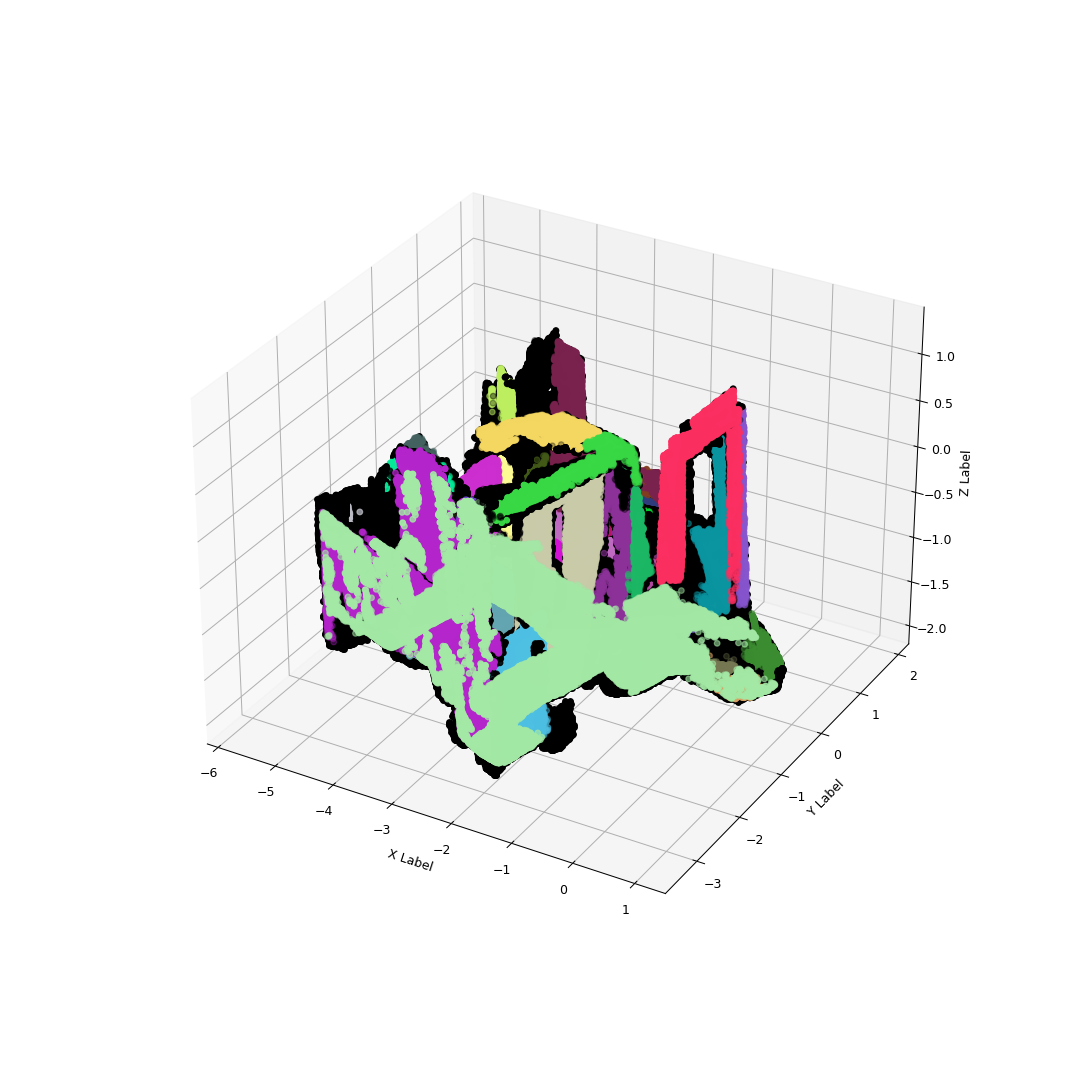

Text(0.5, 0, 'Z Label')

In [40]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
for idx, grp in enumerate(sts): 
        ax.scatter3D([-cloud.iloc[i, 0] for i in grp], [cloud.iloc[i, 2] for i in grp], [cloud.iloc[i, 1] for i in grp], 
                 label='Cluster {}'.format(idx), color = colors[idx])
    #if cluster_size[idx] > 100:
        #ax.scatter3D([-cloud.iloc[i, 1] for i in cen], [cloud.iloc[i, 3] for i in cen], [cloud.iloc[i, 2] for i in cen], c='black', marker='x', label='Centroids')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

<IPython.core.display.Javascript object>


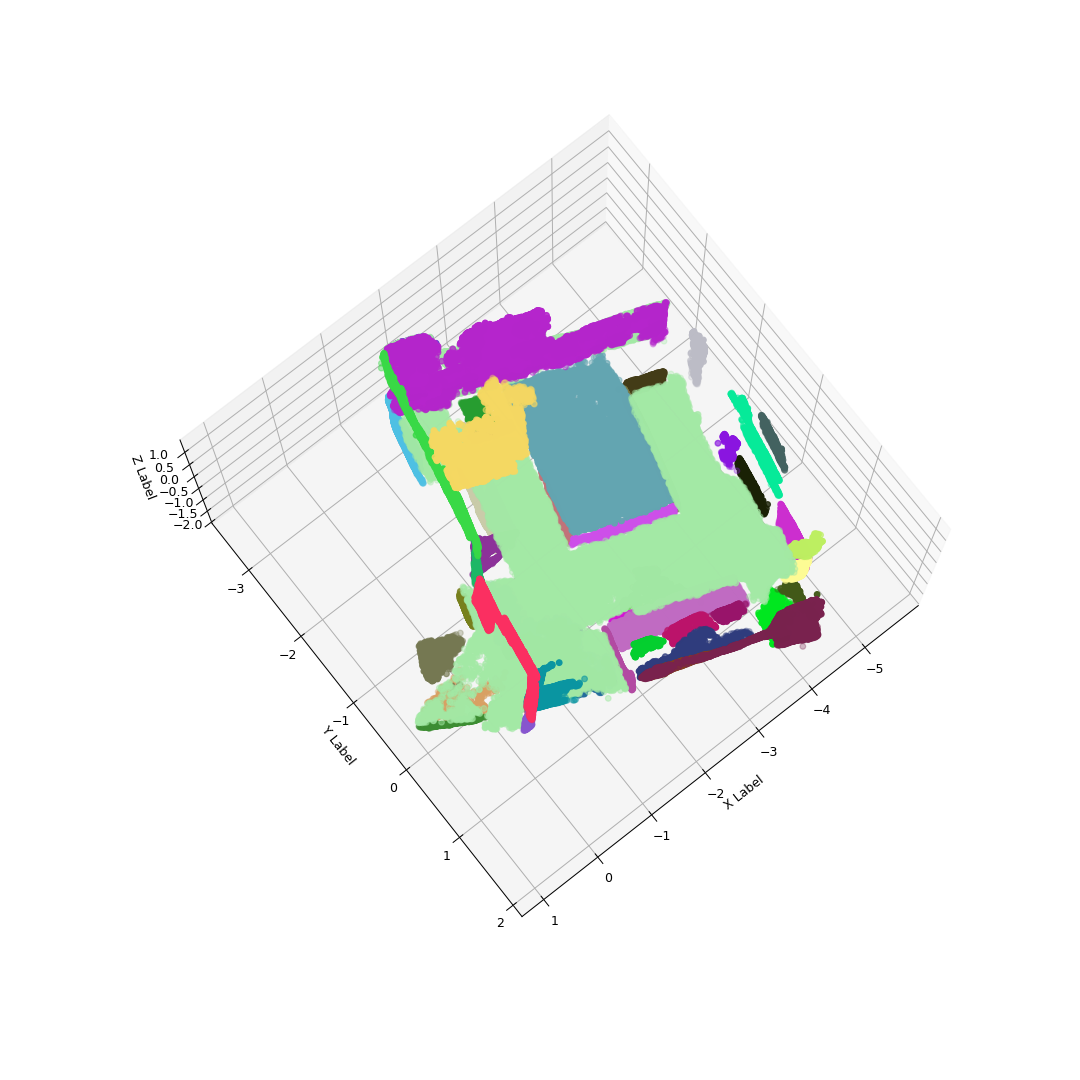

Text(0.5, 0, 'Z Label')

In [41]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
for idx, grp in enumerate(sts): 
    if cluster_size[idx] > threshold:
        ax.scatter3D([-cloud.iloc[i, 0] for i in grp], [cloud.iloc[i, 2] for i in grp], [cloud.iloc[i, 1] for i in grp], 
                 label='Cluster {}'.format(idx), color = colors[idx])
    #if cluster_size[idx] > 100:
        #ax.scatter3D([-cloud.iloc[i, 1] for i in cen], [cloud.iloc[i, 3] for i in cen], [cloud.iloc[i, 2] for i in cen], c='black', marker='x', label='Centroids')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

<IPython.core.display.Javascript object>


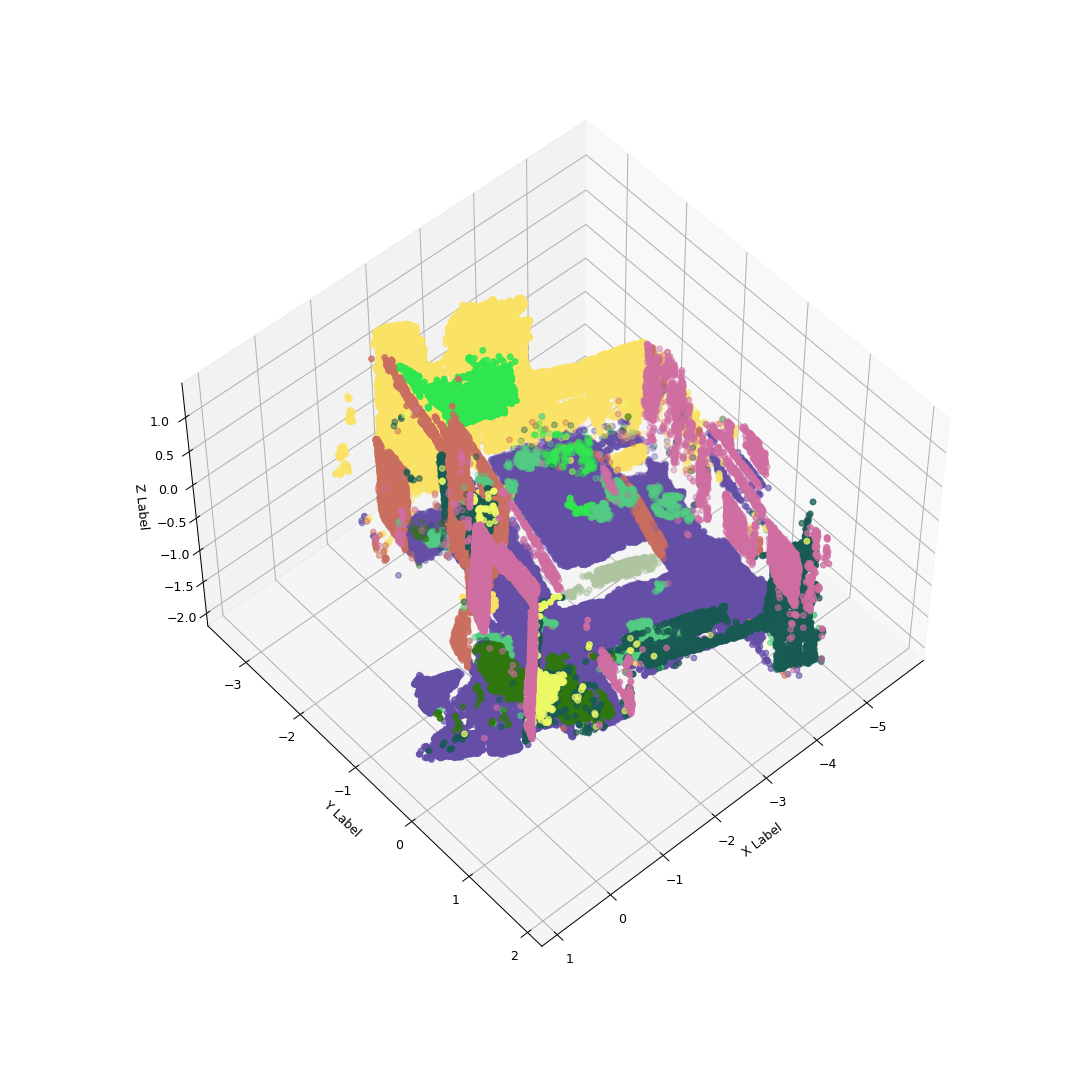

Text(0.5, 0, 'Z Label')

In [146]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
for idx, grp in enumerate(sts): 
    if cluster_size[idx] > threshold:
        ax.scatter3D([-cloud.iloc[i, 0] for i in grp], [cloud.iloc[i, 2] for i in grp], [cloud.iloc[i, 1] for i in grp], 
                 label='Cluster {}'.format(idx), color = colors[idx])
    #if cluster_size[idx] > 100:
        #ax.scatter3D([-cloud.iloc[i, 1] for i in cen], [cloud.iloc[i, 3] for i in cen], [cloud.iloc[i, 2] for i in cen], c='black', marker='x', label='Centroids')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [134]:
sorted(cluster_size, reverse=True)

[45500,
 25901,
 12789,
 9102,
 6605,
 3076,
 2677,
 2366,
 2020,
 860,
 697,
 566,
 369,
 340,
 263,
 220,
 163,
 138,
 136,
 127,
 86,
 81,
 79,
 77,
 65,
 65,
 62,
 62,
 60,
 58,
 56,
 56,
 53,
 50,
 48,
 46,
 46,
 46,
 45,
 44,
 44,
 44,
 43,
 43,
 41,
 41,
 40,
 39,
 39,
 39,
 39,
 38,
 36,
 36,
 35,
 35,
 35,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17

In [135]:
np.sum([elem for elem in cluster_size if elem > threshold])

112868

In [137]:
grps = []
for idx, grp in enumerate(sts):
    if cluster_size[idx] > threshold:
        grps = grps + list(grp)

In [138]:
grps

[300515,
 299458,
 298623,
 298619,
 298616,
 294626,
 294601,
 294162,
 292283,
 290948,
 290939,
 290912,
 290902,
 285793,
 285792,
 285776,
 285767,
 285757,
 285749,
 285748,
 285747,
 285725,
 274832,
 274814,
 274812,
 274800,
 274790,
 274772,
 274770,
 274769,
 274762,
 274738,
 274719,
 274676,
 274586,
 274547,
 274533,
 274518,
 274515,
 274504,
 269553,
 269534,
 269531,
 269515,
 269514,
 269502,
 269496,
 269490,
 269489,
 269484,
 269480,
 269465,
 269464,
 269457,
 269455,
 269446,
 269436,
 269432,
 269427,
 269416,
 269403,
 269396,
 269394,
 269374,
 269371,
 269344,
 269339,
 269334,
 269321,
 269320,
 269317,
 269309,
 269305,
 269302,
 269272,
 269267,
 269266,
 269256,
 269215,
 269193,
 269188,
 269187,
 269186,
 269185,
 269184,
 269173,
 268571,
 268570,
 268565,
 268563,
 268562,
 268556,
 268552,
 268538,
 268526,
 268524,
 268523,
 268521,
 268519,
 268493,
 268488,
 268447,
 268441,
 268439,
 268436,
 268432,
 268431,
 268430,
 268429,
 268428,
 268419,
 

In [139]:
cloud_new = cloud.iloc[grps, :]

In [140]:
cloud_new.shape

(112868, 9)

In [110]:
cloud_new.to_csv("point_cloud_fancy_medium_reduced2_without_noise.csv")

In [142]:
cloud_new

//X         Y         Z    R    G    B        Nx        Ny  \
300515  1.491772 -1.727567  0.759082  126  131  126 -0.070032  0.990782   
299458  4.474138 -1.832420  1.393920  126  131  126 -0.101585  0.991883   
298623  2.619034 -1.434015 -2.621398  126  131  126  0.046336  0.960538   
298619  2.671193 -1.446876 -2.641610  126  131  126  0.055101  0.949523   
298616  2.655250 -1.447890 -2.644108  126  131  126 -0.001216  0.959055   
...          ...       ...       ...  ...  ...  ...       ...       ...   
211085  3.403018 -1.487215  0.577204   91  108  126 -0.264803  0.083151   
165208  3.277639 -1.277165 -0.562938   92  124  140 -0.214389 -0.034733   
164510  3.717417 -1.446642 -0.451004   85  104  110 -0.285043  0.092411   
165759  3.195117 -1.288297 -0.582856   71   99  114 -0.183806 -0.001142   
211021  3.298700 -1.420411  0.555789   91  102  114 -0.253463 -0.071877   

              Nz  
300515  0.115955  
299458  0.076474  
298623 -0.274261  
298619 -0.308819  
298616 -0.283219  
...          ...  
211085  0.960711  
165208  0.976131  
164510  0.954049  
165759  0.982962  
211021  0.964671  

[112868 rows x 9 columns]

<IPython.core.display.Javascript object>


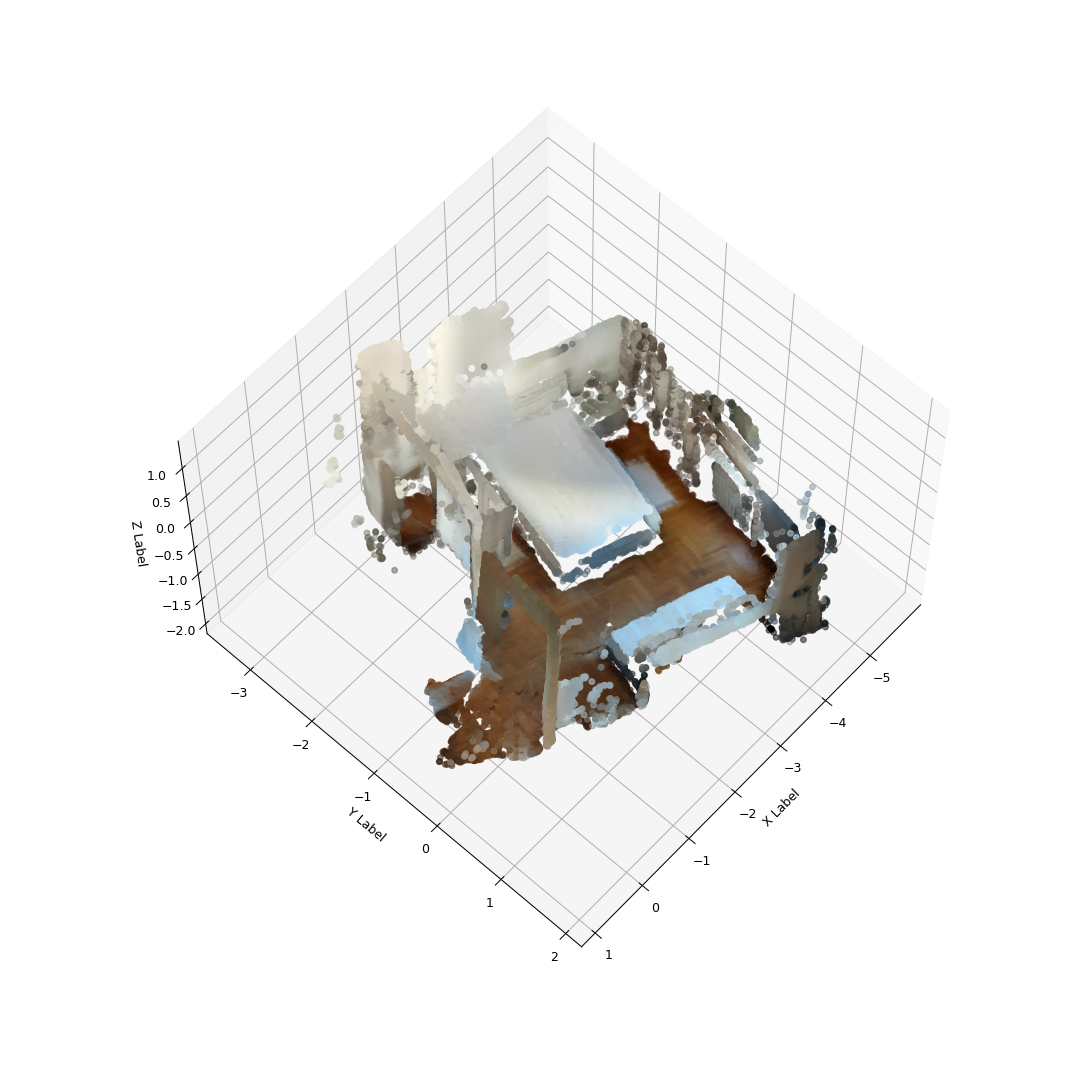

Text(0.5, 0, 'Z Label')

In [143]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
xs = -cloud_new.iloc[:, 0]
ys = cloud_new.iloc[:, 2]
zs = cloud_new.iloc[:, 1]
colors = np.asarray([(cloud_new.iloc[i, 3]/255, cloud_new.iloc[i, 4]/255, cloud_new.iloc[i, 5]/255) for i in np.arange(cloud_new.shape[0])])
ax.scatter3D(xs, ys, zs, c=colors, zdir='-z')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')